In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math

In [2]:
tf.__version__

'2.8.0'

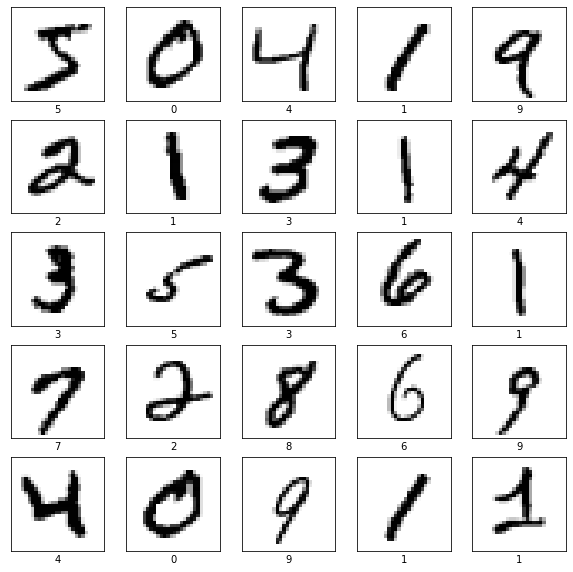

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [4]:
train_images = train_images.reshape(train_images.shape[0], 28, 28)

In [5]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255.
test_images = test_images / 255.

In [6]:
train_images.shape

(60000, 28, 28)

Text(0.5, 1.0, 'Ground Truth : 7')

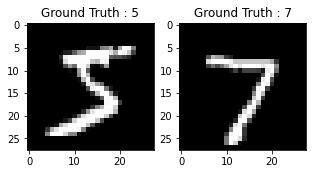

In [7]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [8]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [9]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255.
test_images = test_images / 255.

## One hot encoded vector

In [10]:
from tensorflow.keras.utils import to_categorical
# Change the labels from categorical to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Display the change for category label using one-hot encoding
print('Original label:', train_labels[0])
print('After conversion to one-hot:', train_labels_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
train_labels_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [12]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_images, train_labels_one_hot, test_size=0.1, random_state=13)

In [13]:
train_X.shape

(54000, 28, 28, 1)

## CNN Model

In [14]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [15]:
batch_size = 64
epochs = 10
num_classes = 10

In [16]:
mnist_model = Sequential()
mnist_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
mnist_model.add(MaxPooling2D((2, 2),padding='same'))
mnist_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
mnist_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mnist_model.add(Flatten())
mnist_model.add(Dense(128, activation='linear'))
mnist_model.add(Dense(num_classes, activation='softmax'))

2022-10-05 10:45:38.538672: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:

# mnist_model.compile(loss=keras.losses.SparseCategoricalCrossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


mnist_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [18]:
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [19]:
mnist_train = mnist_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/10
844/844 [==============================] - 24s 28ms/step - loss: 0.4924 - accuracy: 0.8438 - val_loss: 0.1866 - val_accuracy: 0.9470
Epoch 2/10
844/844 [==============================] - 26s 31ms/step - loss: 0.1405 - accuracy: 0.9587 - val_loss: 0.1073 - val_accuracy: 0.9675
Epoch 3/10
844/844 [==============================] - 28s 33ms/step - loss: 0.0916 - accuracy: 0.9729 - val_loss: 0.0885 - val_accuracy: 0.9730
Epoch 4/10
844/844 [==============================] - 26s 31ms/step - loss: 0.0737 - accuracy: 0.9784 - val_loss: 0.0841 - val_accuracy: 0.9750
Epoch 5/10
844/844 [==============================] - 27s 32ms/step - loss: 0.0642 - accuracy: 0.9802 - val_loss: 0.0762 - val_accuracy: 0.9785
Epoch 6/10
844/844 [==============================] - 35s 42ms/step - loss: 0.0545 - accuracy: 0.9833 - val_loss: 0.0612 - val_accuracy: 0.9830
Epoch 7/10
844/844 [==============================] - 28s 33ms/step - loss: 0.0522 - accuracy: 0.9833 - val_loss: 0.0638 - val_accuracy:

In [20]:
test_eval = mnist_model.evaluate(test_images, test_labels_one_hot, verbose=0)

In [21]:
test_eval = mnist_model.evaluate(test_images, test_labels_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.04485909640789032
Test accuracy: 0.984499990940094


In [22]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']
class_names[train_labels[20]]

'4'

# Get labels, images, perturbation of all class n

#### indices of class 2

In [23]:
def get_indicies_of_class_n(n_in_string):
    indices = [i for i in range(len(test_images)) if class_names[test_labels[i]] == n_in_string]
    print('Found', len(indices), 'twos')
    print(indices[:20])
    return indices

In [24]:
indices_of_1 = get_indicies_of_class_n('1')

Found 1135 twos
[2, 5, 14, 29, 31, 37, 39, 40, 46, 57, 74, 89, 94, 96, 107, 135, 137, 143, 145, 154]


In [25]:
indices_of_2 = get_indicies_of_class_n('2')

Found 1032 twos
[1, 35, 38, 43, 47, 72, 77, 82, 106, 119, 147, 149, 172, 174, 186, 199, 208, 221, 222, 225]


In [26]:
indices_of_3 = get_indicies_of_class_n('3')

Found 1010 twos
[18, 30, 32, 44, 51, 63, 68, 76, 87, 90, 93, 112, 142, 158, 173, 195, 200, 205, 213, 216]


In [27]:
indices_of_4 = get_indicies_of_class_n('4')

Found 982 twos
[4, 6, 19, 24, 27, 33, 42, 48, 49, 56, 65, 67, 85, 95, 103, 109, 115, 116, 117, 121]


In [28]:
indices_of_5 = get_indicies_of_class_n('5')

Found 892 twos
[8, 15, 23, 45, 52, 53, 59, 102, 120, 127, 129, 132, 152, 153, 155, 162, 165, 167, 182, 187]


In [29]:
indices_of_6 = get_indicies_of_class_n('6')

Found 958 twos
[11, 21, 22, 50, 54, 66, 81, 88, 91, 98, 100, 123, 130, 131, 138, 140, 156, 161, 164, 197]


In [30]:
indices_of_7 = get_indicies_of_class_n('7')

Found 1028 twos
[0, 17, 26, 34, 36, 41, 60, 64, 70, 75, 79, 80, 83, 86, 97, 111, 114, 122, 124, 133]


In [31]:
indices_of_8 = get_indicies_of_class_n('8')

Found 974 twos
[61, 84, 110, 128, 134, 146, 177, 179, 181, 184, 226, 232, 233, 242, 257, 260, 266, 268, 277, 290]


In [32]:
# plt.figure(figsize=(10,10))
# for i in range(20):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(test_images[indices_of_8[i]], cmap=plt.cm.binary)
#     plt.xlabel(class_names[test_labels[indices_of_8[i]]])
# plt.show()

#### images of class n

In [33]:
def get_images_of_class_n(test_images, indices):
    images = [test_images[i] for i in indices]
    print('length of images: ',len(images))
    for i in range(len(images)):
        images[i] = images[i].reshape(1, 28, 28, 1)
        images[i]= tf.convert_to_tensor(images[i], dtype=tf.float32)
    return images

In [34]:
images_of_1 = get_images_of_class_n(test_images, indices_of_1)

length of images:  1135


In [35]:
images_of_2 = get_images_of_class_n(test_images, indices_of_2)

length of images:  1032


In [36]:
images_of_3 = get_images_of_class_n(test_images, indices_of_3)

length of images:  1010


In [37]:
images_of_4 = get_images_of_class_n(test_images, indices_of_4)

length of images:  982


In [38]:
images_of_5 = get_images_of_class_n(test_images, indices_of_5)

length of images:  892


In [39]:
images_of_6 = get_images_of_class_n(test_images, indices_of_6)

length of images:  958


In [40]:
images_of_7 = get_images_of_class_n(test_images, indices_of_7)

length of images:  1028


In [41]:
images_of_2[0].shape

TensorShape([1, 28, 28, 1])

In [42]:
images_of_8 = get_images_of_class_n(test_images, indices_of_8)

length of images:  974


### Create Prediction of all class 2

In [43]:
def perdiction_of_class_n(images):
    prediction = [mnist_model.predict(images[i]) for i in range(len(images))]
#     print('label/argmax(): ', prediction.argmax())
#     print('np.max(): ', 100*np.max(prediction))
    return prediction

In [44]:
prediction_of_1 =perdiction_of_class_n(images_of_1)

In [45]:
prediction_of_2 =perdiction_of_class_n(images_of_2)

In [65]:
prediction_of_3 =perdiction_of_class_n(images_of_3)

In [66]:
prediction_of_4 =perdiction_of_class_n(images_of_4)

In [67]:
prediction_of_5 =perdiction_of_class_n(images_of_5)

In [68]:
prediction_of_6 =perdiction_of_class_n(images_of_6)

In [69]:
prediction_of_7 =perdiction_of_class_n(images_of_7)

In [38]:
# prediction_of_2[1031]

In [39]:
# (prediction_of_2[1031]).argmax()

In [40]:
# 100*np.max(prediction_of_2[1031])

In [46]:
prediction_of_8 =perdiction_of_class_n(images_of_8)

In [47]:
def create_labels(prediction, images):
    labels = [tf.one_hot(1, prediction[i].shape[-1]) for i in range(len(images))]
    labels = [tf.reshape(labels[i], (1, prediction[i].shape[-1])) for i in range(len(images))]
# prediction_of_2
    return labels
label_of_2 = create_labels(prediction_of_2, images_of_2)

In [48]:
label_of_1 = create_labels(prediction_of_1, images_of_1)

In [71]:
label_of_3 = create_labels(prediction_of_3, images_of_3)

In [72]:
label_of_4 = create_labels(prediction_of_4, images_of_4)

In [73]:
label_of_5 = create_labels(prediction_of_5, images_of_5)

In [74]:
label_of_6 = create_labels(prediction_of_6, images_of_6)

In [75]:
label_of_7 = create_labels(prediction_of_7, images_of_7)

In [49]:
label_of_8 = create_labels(prediction_of_8, images_of_8)

# creating adversarial example with [2]

In [50]:
# create adversarial pattern with Cross Entropy loss func and the gradient
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label, model):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        loss = loss_object(input_label, prediction)
#         print(loss)

  # Get the gradients of the loss w.r.t to the input image.
    gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
    signed_grad = tf.sign(gradient)
    return signed_grad


In [52]:
def create_perturb_of_class_n(images, labels):
    perturb = [create_adversarial_pattern(images[i], labels[i], mnist_model) 
                      for i in range(len(images))]
    return perturb
perturbations_of_2 = create_perturb_of_class_n(images_of_2, label_of_2)

In [53]:
perturbations_of_1 = create_perturb_of_class_n(images_of_1, label_of_1)

In [ ]:
perturbations_of_3 = create_perturb_of_class_n(images_of_3, label_of_3)

In [ ]:
perturbations_of_4 = create_perturb_of_class_n(images_of_4, label_of_4)

In [54]:
perturbations_of_8 = create_perturb_of_class_n(images_of_8, label_of_8)

## Change perturbation shape to 28,28

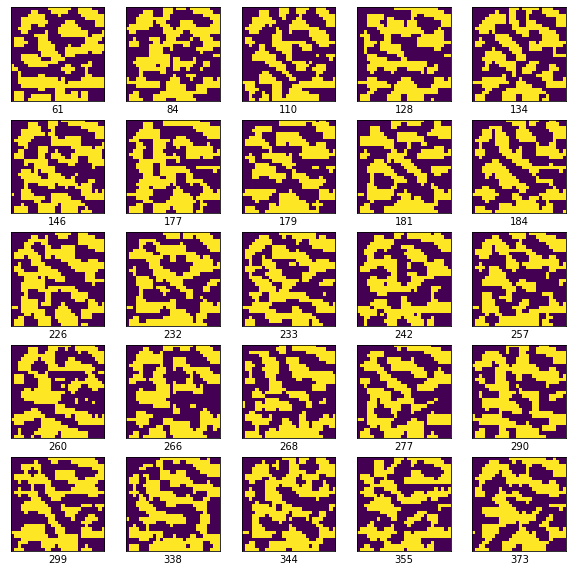

In [51]:
# 25 perturbations of class 2
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(perturbations_of_8[i][0] * 0.05 + 0.05)
    plt.xlabel(indices_of_8[i])
plt.show()

## kmeans

In [55]:
def k_means_perturb(perturbations):
    k_mean_perturb = [perturbations[i][0].numpy() for i in range(len(perturbations))]
    k_mean_perturb = np.squeeze(k_mean_perturb)
    k_mean_perturb= k_mean_perturb.reshape(len(perturbations),-1)
    print("shape: ", k_mean_perturb.shape)
    return k_mean_perturb

In [57]:
perturbations_kmeans_1 = k_means_perturb(perturbations_of_1)

shape:  (1135, 784)


In [56]:
perturbations_kmeans_2 = k_means_perturb(perturbations_of_2)

shape:  (1032, 784)


In [58]:
perturbations_kmeans_8 = k_means_perturb(perturbations_of_8)

shape:  (974, 784)


## k mean cluster of 1

In [59]:
result = train_images[0].reshape(len(train_images[0]),-1)
result.shape

(28, 28)

In [60]:
# k mean cluster of 1
from sklearn.cluster import KMeans
def kmean_of_class_n(perturbation):
    kmean_mnist_1 = KMeans(n_clusters = 1)
    kmean_mnist_1.fit(perturbation)
    #extract the centroids and labels for each pixel
    centroids_1 = kmean_mnist_1.cluster_centers_
    labels_1 = kmean_mnist_1.labels_
    centroids_1 = centroids_1.reshape(1,28,28)

    for i in centroids_1:
        plt.figure()
        plt.imshow(i)
    #     plt.axis('off')
        result = i
        print(i.shape)
        plt.show()
    return result

(28, 28)


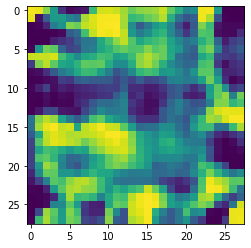

True

In [61]:
import cv2
class_2_kmean = kmean_of_class_n(perturbations_kmeans_2)
# class_2_kmean= class_2_kmean.save("class_2_kmean.jpg")
cv2.imwrite('2.jpg',class_2_kmean)

In [62]:
class_2_kmean.shape

(28, 28)

In [72]:
class_2_kmean = class_2_kmean

img1 = Image.fromarray(class_2_kmean, 'RGB')
img2 = Image.fromarray(class_8_kmean,'RGB')
# Display the Numpy array as Image
img1.show()


(28, 28)


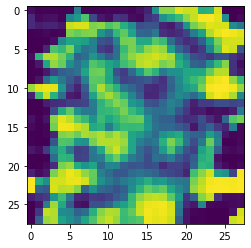

True

In [63]:
class_8_kmean = kmean_of_class_n(perturbations_kmeans_8)
cv2.imwrite('8.jpg',class_8_kmean)

In [ ]:
Eucldiean distance, similarity.
what kind of new information
how having plots can answer where these perturbation came from
dimenion reduction

(28, 28)


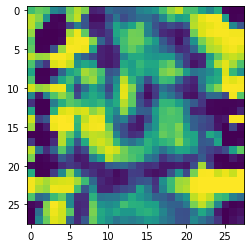

True

In [64]:
class_1_kmean = kmean_of_class_n(perturbations_kmeans_1)
# class_2_kmean= class_2_kmean.save("class_2_kmean.jpg")
cv2.imwrite('1.jpg',class_1_kmean)

In [ ]:
colormap = 'plasma'
fig = plt.figure(figsize=(20,20))

ax2 = plt.subplot(1, 4, 3, aspect='equal')
ax2.imshow(np.squeeze(img), alpha = 0.5, cmap='plasma')
hm = ax2.imshow(heatmap, alpha = 0.5)

In [101]:
from PIL import Image, ImageChops
  img1 = cv2.imread('2.jpg')

In [ ]:
lab = cv2.cvtColor(img1, cv2.COLOR_BGR2LAB)
a_component = lab[:,:,1]
th = cv2.threshold(a_component,140,255,cv2.THRESH_BINARY)[1]
blur = cv2.GaussianBlur(th,(13,13), 11)
heatmap_img = cv2.applyColorMap(blur, cv2.COLORMAP_JET)
cv2.imshow('image', img1)
cv2.imshow('heatmap', heatmap_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

In [2]:
import cv2

# Load images as grayscale
img1 = cv2.imread('2.jpg')
img2 = cv2.imread('8.jpg')

# Calculate the per-element absolute difference between 
# two arrays or between an array and a scalar
# diff = 255 - cv2.absdiff(img1, img2)

# cv2.imshow('diff', diff)
# cv2.waitKey()

In [ ]:
import cv2

heatmap = cv2.applyColorMap(img1, cv2.COLORMAP_HOT)

cv2.imshow('heatmap', heatmap)
cv2.waitKey()

In [1]:
import cv2

# Load images as grayscale
image1 = cv2.imread("2.jpg", 0)
image2 = cv2.imread("8.jpg", 0)

# Calculate the per-element absolute difference between 
# two arrays or between an array and a scalar
diff = cv2.absdiff(img1, img2)

cv2.imshow('diff', diff)
# cv2.waitKey()

In [ ]:
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

In [112]:
labels_1.shape

(1031,)

In [170]:
centroids_1.shape

(1, 28, 28)

In [130]:
kmean_mnist_1.cluster_centers_.shape

(1, 784)

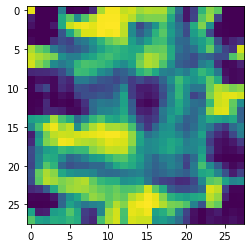

In [104]:
plt.imshow(result)

In [177]:
result.shape

(28, 28)

In [2]:
import seaborn as sns
A = labels_1.reshape(28,28)
# plt.figure()
# ax = sns.heatmap(cu_map, square = True)
plt.figure()
ay = sns.heatmap(A)

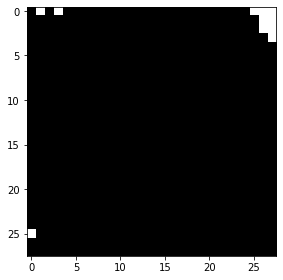

In [105]:
from skimage import io
#Replace each pixel value with its nearby centroid
compressed_image = result
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image = compressed_image.reshape(28, 28)

#Save and display output image
# io.imsave('compressed_image_64.png', compressed_image)
io.imshow(compressed_image)
io.show()
